MBAN 6120 U: Assignment 2 - Clustering

- Name: Mahin Bindra
- Student ID: 220089330

In [657]:
# import relevant libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
from sklearn.pipeline import Pipeline
from scipy.stats import zscore
from scipy.stats import skew, kurtosis
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
import random
random.seed(42)

In [658]:
# read the credit card dataset
df = pd.read_csv('/Users/mahinbindra/Desktop/Customer_Data.csv')

In [659]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [660]:
# assess statistics of the dataset
df.describe().transpose()

count         mean          std        min   
BALANCE                           8950.0  1564.474828  2081.531879   0.000000  \
BALANCE_FREQUENCY                 8950.0     0.877271     0.236904   0.000000   
PURCHASES                         8950.0  1003.204834  2136.634782   0.000000   
ONEOFF_PURCHASES                  8950.0   592.437371  1659.887917   0.000000   
INSTALLMENTS_PURCHASES            8950.0   411.067645   904.338115   0.000000   
CASH_ADVANCE                      8950.0   978.871112  2097.163877   0.000000   
PURCHASES_FREQUENCY               8950.0     0.490351     0.401371   0.000000   
ONEOFF_PURCHASES_FREQUENCY        8950.0     0.202458     0.298336   0.000000   
PURCHASES_INSTALLMENTS_FREQUENCY  8950.0     0.364437     0.397448   0.000000   
CASH_ADVANCE_FREQUENCY            8950.0     0.135144     0.200121   0.000000   
CASH_ADVANCE_TRX                  8950.0     3.248827     6.824647   0.000000   
PURCHASES_TRX                     8950.0    14.709832    24.857649   0.000000   
CREDIT_LIMIT                      8949.0  4494.449450  3638.815725  50.000000   
PAYMENTS                          8950.0  1733.143852  2895.063757   0.000000   
MINIMUM_PAYMENTS                  8637.0   864.206542  2372.446607   0.019163   
PRC_FULL_PAYMENT                  8950.0     0.153715     0.292499   0.000000   
TENURE                            8950.0    11.517318     1.338331   6.000000   

                                          25%          50%          75%   
BALANCE                            128.281915   873.385231  2054.140036  \
BALANCE_FREQUENCY                    0.888889     1.000000     1.000000   
PURCHASES                           39.635000   361.280000  1110.130000   
ONEOFF_PURCHASES                     0.000000    38.000000   577.405000   
INSTALLMENTS_PURCHASES               0.000000    89.000000   468.637500   
CASH_ADVANCE                         0.000000     0.000000  1113.821139   
PURCHASES_FREQUENCY                  0.083333     0.500000     0.916667   
ONEOFF_PURCHASES_FREQUENCY           0.000000     0.083333     0.300000   
PURCHASES_INSTALLMENTS_FREQUENCY     0.000000     0.166667     0.750000   
CASH_ADVANCE_FREQUENCY               0.000000     0.000000     0.222222   
CASH_ADVANCE_TRX                     0.000000     0.000000     4.000000   
PURCHASES_TRX                        1.000000     7.000000    17.000000   
CREDIT_LIMIT                      1600.000000  3000.000000  6500.000000   
PAYMENTS                           383.276166   856.901546  1901.134317   
MINIMUM_PAYMENTS                   169.123707   312.343947   825.485459   
PRC_FULL_PAYMENT                     0.000000     0.000000     0.142857   
TENURE                              12.000000    12.000000    12.000000   

                                          max  
BALANCE                           19043.13856  
BALANCE_FREQUENCY                     1.00000  
PURCHASES                         49039.57000  
ONEOFF_PURCHASES                  40761.25000  
INSTALLMENTS_PURCHASES            22500.00000  
CASH_ADVANCE                      47137.21176  
PURCHASES_FREQUENCY                   1.00000  
ONEOFF_PURCHASES_FREQUENCY            1.00000  
PURCHASES_INSTALLMENTS_FREQUENCY      1.00000  
CASH_ADVANCE_FREQUENCY                1.50000  
CASH_ADVANCE_TRX                    123.00000  
PURCHASES_TRX                       358.00000  
CREDIT_LIMIT                      30000.00000  
PAYMENTS                          50721.48336  
MINIMUM_PAYMENTS                  76406.20752  
PRC_FULL_PAYMENT                      1.00000  
TENURE                               12.00000

## 1. Data Pre-Processing

In [661]:
# check for null values within the columns
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Based on the above results, no columns except 'Credit_Limit' and 'Minimum_Payments' contain missing values. Since these values are less than 10% of the entire dataset (only ~3%), we can drop these values right away or impute the missing values with the mean of the column to maintain data integrity. However, if we decide to impute the values, we must ensure that the column's statistics do not change significantly.

In [662]:
# checck for any unknown values
unknown_columns = df.columns[df.eq('unknown').any()]
unknown_columns

Index([], dtype='object')

In [663]:
df[df['CREDIT_LIMIT'].isnull() & df['MINIMUM_PAYMENTS'].isnull()]

Empty DataFrame
Columns: [CUST_ID, BALANCE, BALANCE_FREQUENCY, PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, CASH_ADVANCE, PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, CASH_ADVANCE_FREQUENCY, CASH_ADVANCE_TRX, PURCHASES_TRX, CREDIT_LIMIT, PAYMENTS, MINIMUM_PAYMENTS, PRC_FULL_PAYMENT, TENURE]
Index: []

In [664]:
df2 = df.copy()

In [665]:
# calculate mean of the Minimum_Payments
minimum_payments_mean = df['MINIMUM_PAYMENTS'].mean()
minimum_payments_mean

864.2065423050828

In [666]:
# Impute missing values within Minimum_Payments column with mean of that column
df2['MINIMUM_PAYMENTS'].fillna(minimum_payments_mean, inplace=True)

We first impute the missing values in the 'Minimum_Payments' column with the mean of that column, in this case 864.20

In [667]:
# Check stats for original datafram
df['MINIMUM_PAYMENTS'].describe()

count     8637.000000
mean       864.206542
std       2372.446607
min          0.019163
25%        169.123707
50%        312.343947
75%        825.485459
max      76406.207520
Name: MINIMUM_PAYMENTS, dtype: float64

In [668]:
# Check stats for updated dataframe
df2['MINIMUM_PAYMENTS'].describe()

count     8950.000000
mean       864.206542
std       2330.588021
min          0.019163
25%        170.857654
50%        335.628312
75%        864.206542
max      76406.207520
Name: MINIMUM_PAYMENTS, dtype: float64

Since the change in statistics before and after imputing missing values in the 'Minimum_Payments' column with the mean of the column is relatively minimal, imputing is unlikely to significantly alter results or introduce substantial bias while maintaining data integrity. Hence, we will go ahead with the imputed column and not drop any values from this column.

In [669]:
df2[df2['CREDIT_LIMIT'].isnull()]

CUST_ID    BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES   
5203  C15349  18.400472           0.166667        0.0               0.0  \

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY   
5203                     0.0    186.853063                  0.0  \

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY   
5203                         0.0                               0.0  \

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT   
5203                0.166667                 1              0           NaN  \

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
5203  9.040017         14.418723               0.0       6

In [670]:
# drop missing values from the dataset, in this case only one
df2.dropna(inplace=True)

In [671]:
df2['CASH_ADVANCE_FREQUENCY'].unique()

array([0.      , 0.25    , 0.083333, 0.166667, 0.333333, 0.363636,
       0.833333, 0.5     , 0.727273, 0.125   , 0.875   , 0.111111,
       0.416667, 0.181818, 0.545455, 0.75    , 0.142857, 0.583333,
       0.666667, 0.222222, 0.285714, 0.909091, 0.2     , 0.625   ,
       0.090909, 0.4     , 1.      , 0.8     , 0.636364, 0.3     ,
       0.916667, 0.444444, 1.25    , 0.1     , 0.428571, 0.272727,
       0.555556, 0.6     , 0.454545, 1.166667, 0.375   , 0.777778,
       0.714286, 0.571429, 0.857143, 1.125   , 1.1     , 1.5     ,
       0.7     , 0.818182, 0.9     , 0.888889, 1.090909, 1.142857])

From the data description above, we could gather that the maximum value in the 'Cash_Advance_Frequency' column is 1.5; however, based on the data dictionary provided on Kaggle, it is evident that 'Cash_Advance_Frequency' is a score between 0 and 1. Hence, dropping any values greater than one from this column is crucial as they are outliers and can potentially disrupt results and analysis.

In [672]:
outlier_df = df2[df2['CASH_ADVANCE_FREQUENCY'] > 1]
outlier_df

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES   
681   C10708  5656.069801           1.000000     362.36            362.36  \
1626  C11680  2876.009336           1.000000     152.61            152.61   
2555  C12629  5906.184924           1.000000     141.80            141.80   
2608  C12684  7801.511533           1.000000     231.40            231.40   
3038  C13127  3846.742530           1.000000       0.00              0.00   
3253  C13347  5709.486507           0.833333       0.00              0.00   
8055  C18273  1917.895730           1.000000     285.07            285.07   
8365  C18588  3857.562230           1.000000       0.00              0.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY   
681                      0.0   7240.433194             0.250000  \
1626                     0.0   3719.650168             0.333333   
2555                     0.0   1651.286918             0.125000   
2608                     0.0   4109.465221             0.100000   
3038                     0.0   1932.460679             0.000000   
3253                     0.0   2794.326341             0.000000   
8055                     0.0   6084.858872             0.363636   
8365                     0.0   2127.213754             0.000000   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY   
681                     0.250000                               0.0  \
1626                    0.333333                               0.0   
2555                    0.125000                               0.0   
2608                    0.100000                               0.0   
3038                    0.000000                               0.0   
3253                    0.000000                               0.0   
8055                    0.363636                               0.0   
8365                    0.000000                               0.0   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT   
681                 1.250000                12              2        8000.0  \
1626                1.166667                24              2        4000.0   
2555                1.125000                12              2       10000.0   
2608                1.100000                20              3       13500.0   
3038                1.500000                18              0        5600.0   
3253                1.166667                10              0        6000.0   
8055                1.090909                28              6        3000.0   
8365                1.142857                26              0        5000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
681    683.421497       2036.877611               0.0       8  
1626   248.342971        584.926336               0.0       6  
2555   933.969974        919.289675               0.0       8  
2608  1593.617739       1522.496755               0.0      10  
3038   496.245836        538.346874               0.0       6  
3253   550.513331       1299.463370               0.0       6  
8055  5692.682993        556.449635               0.0      11  
8365   617.508991        538.396872               0.0       7

In [673]:
# drop outliers from the 'Cas_Advance_Frequency' column
df2.drop(outlier_df.index, inplace=True)

In [674]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8941 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8941 non-null   object 
 1   BALANCE                           8941 non-null   float64
 2   BALANCE_FREQUENCY                 8941 non-null   float64
 3   PURCHASES                         8941 non-null   float64
 4   ONEOFF_PURCHASES                  8941 non-null   float64
 5   INSTALLMENTS_PURCHASES            8941 non-null   float64
 6   CASH_ADVANCE                      8941 non-null   float64
 7   PURCHASES_FREQUENCY               8941 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8941 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8941 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8941 non-null   float64
 11  CASH_ADVANCE_TRX                  8941 non-null   int64  
 12  PURCHASES_T

<Axes: >

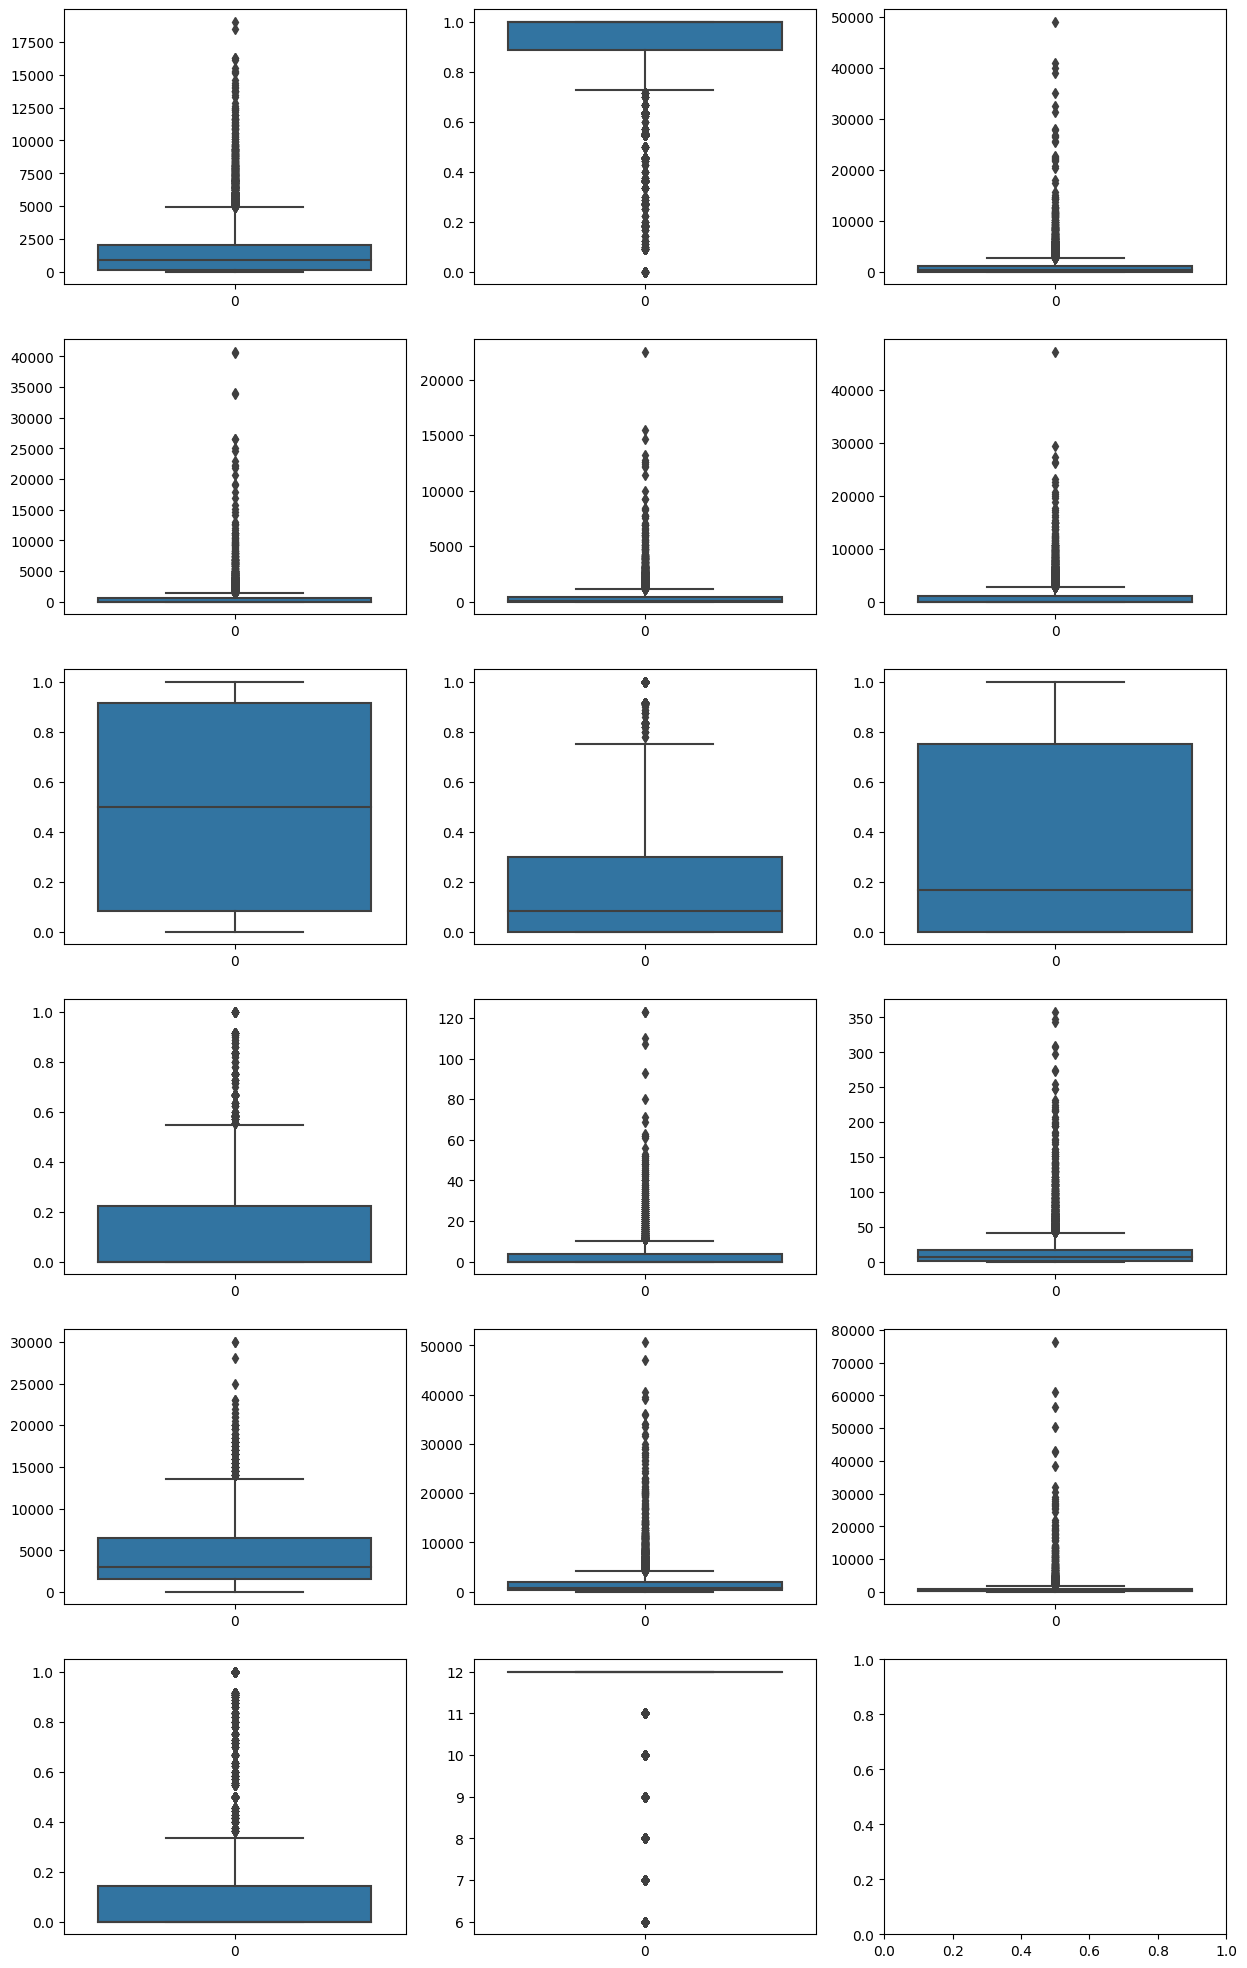

In [675]:
# Conduct univariate analysis of continous variables using boxplots
fig, axs = plt.subplots(6,3, figsize=(15,25))
sns.boxplot(df2['BALANCE'], ax=axs[0][0])
sns.boxplot(df2['BALANCE_FREQUENCY'], ax=axs[0][1])
sns.boxplot(df2['PURCHASES'], ax=axs[0][2])
sns.boxplot(df2['ONEOFF_PURCHASES'], ax=axs[1][0])
sns.boxplot(df2['INSTALLMENTS_PURCHASES'], ax=axs[1][1])
sns.boxplot(df2['CASH_ADVANCE'], ax=axs[1][2])
sns.boxplot(df2['PURCHASES_FREQUENCY'], ax=axs[2][0])
sns.boxplot(df2['ONEOFF_PURCHASES_FREQUENCY'], ax=axs[2][1])
sns.boxplot(df2['PURCHASES_INSTALLMENTS_FREQUENCY'], ax=axs[2][2])
sns.boxplot(df2['CASH_ADVANCE_FREQUENCY'], ax=axs[3][0])
sns.boxplot(df2['CASH_ADVANCE_TRX'], ax=axs[3][1])
sns.boxplot(df2['PURCHASES_TRX'], ax=axs[3][2])
sns.boxplot(df2['CREDIT_LIMIT'], ax=axs[4][0])
sns.boxplot(df2['PAYMENTS'], ax=axs[4][1])
sns.boxplot(df2['MINIMUM_PAYMENTS'], ax=axs[4][2])
sns.boxplot(df2['PRC_FULL_PAYMENT'], ax=axs[5][0])
sns.boxplot(df2['TENURE'], ax=axs[5][1])

<Axes: xlabel='TENURE', ylabel='Count'>

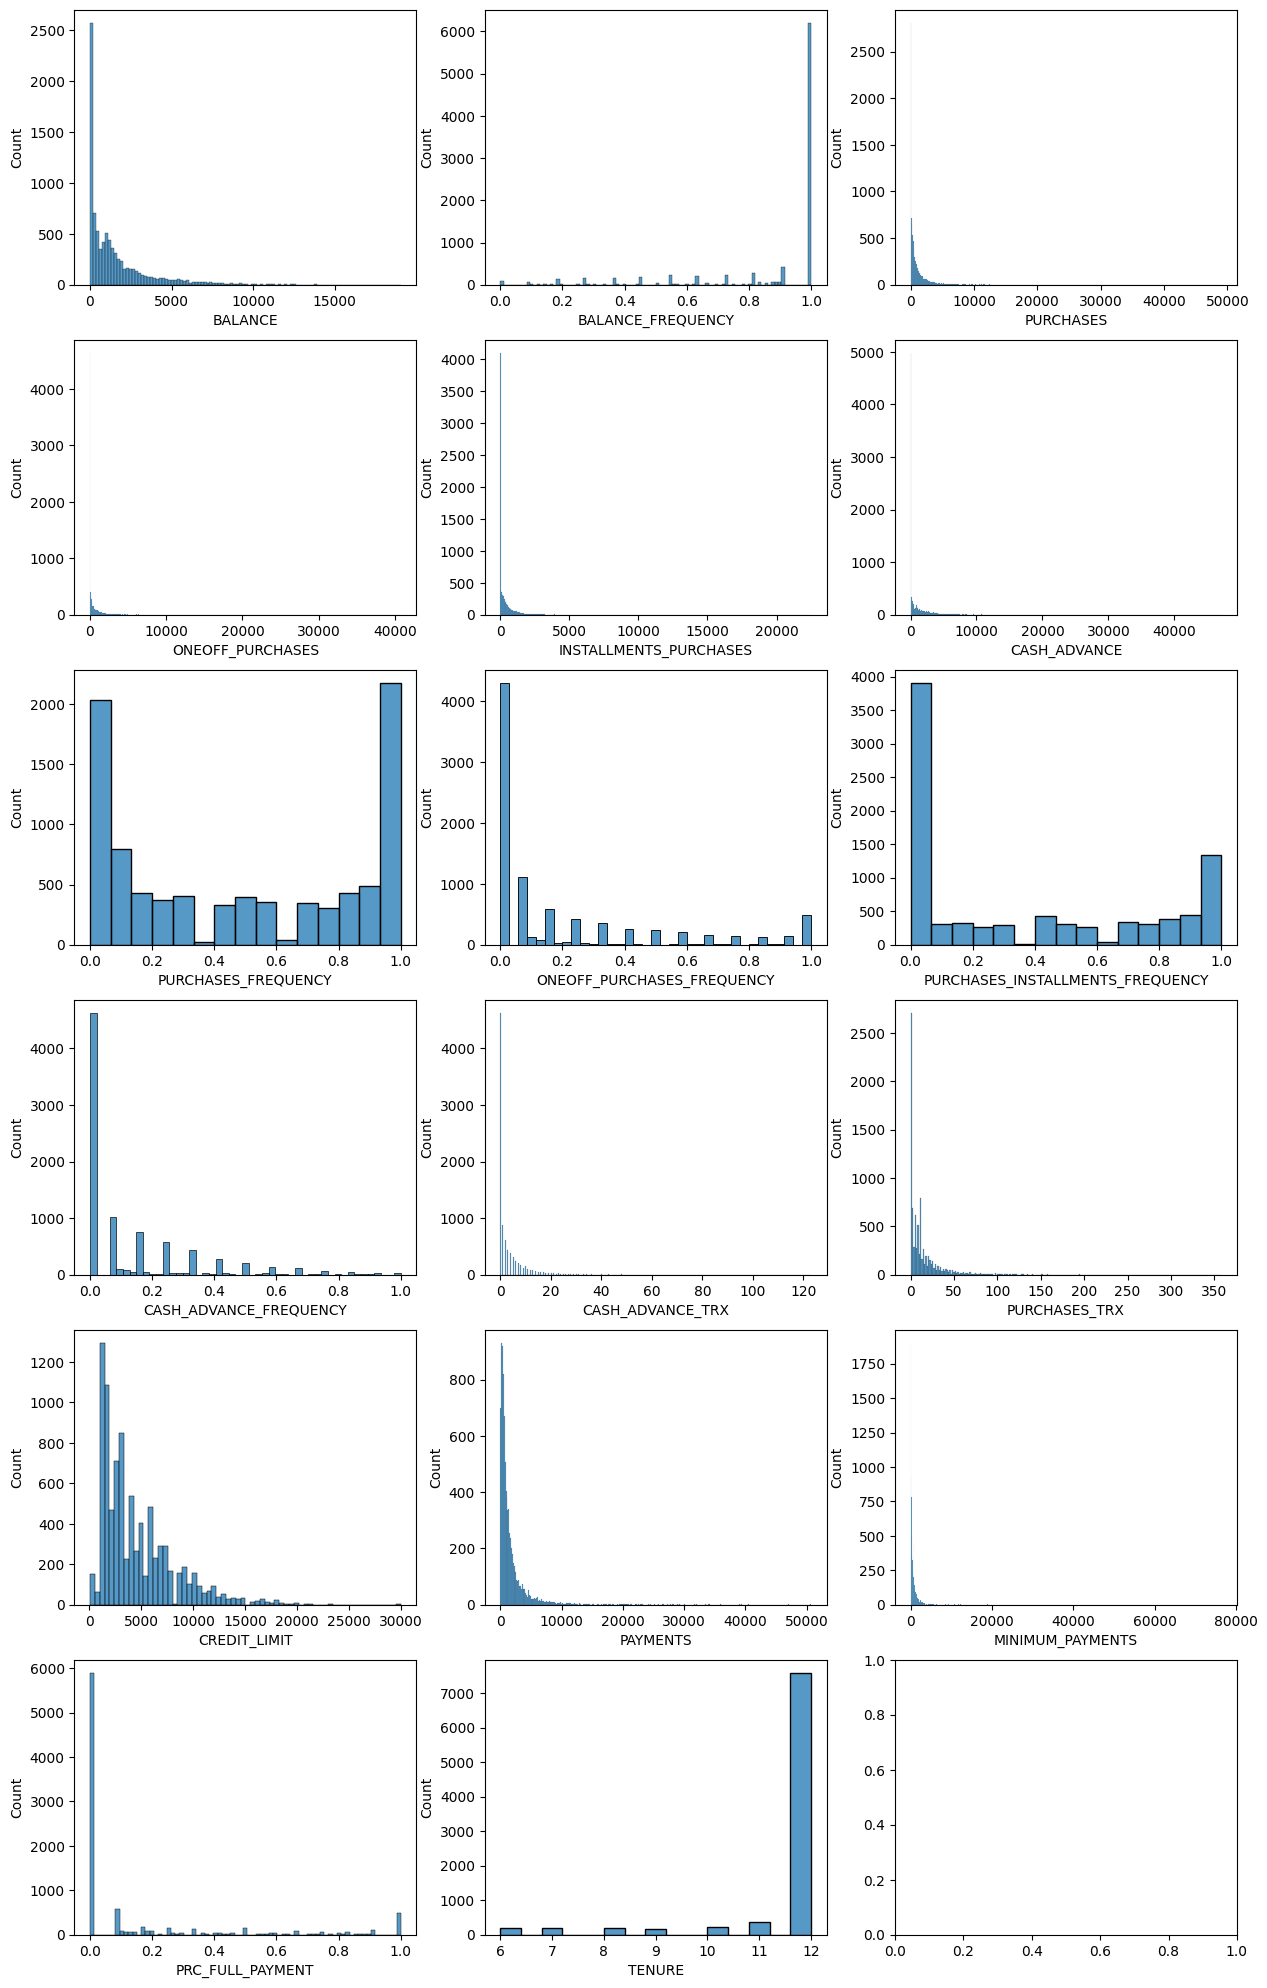

In [676]:
# Conduct univariate analysis of continous variables using histplots
fig, axs = plt.subplots(6,3, figsize=(15,25))
sns.histplot(df2['BALANCE'], ax=axs[0][0])
sns.histplot(df2['BALANCE_FREQUENCY'], ax=axs[0][1])
sns.histplot(df2['PURCHASES'], ax=axs[0][2])
sns.histplot(df2['ONEOFF_PURCHASES'], ax=axs[1][0])
sns.histplot(df2['INSTALLMENTS_PURCHASES'], ax=axs[1][1])
sns.histplot(df2['CASH_ADVANCE'], ax=axs[1][2])
sns.histplot(df2['PURCHASES_FREQUENCY'], ax=axs[2][0])
sns.histplot(df2['ONEOFF_PURCHASES_FREQUENCY'], ax=axs[2][1])
sns.histplot(df2['PURCHASES_INSTALLMENTS_FREQUENCY'], ax=axs[2][2])
sns.histplot(df2['CASH_ADVANCE_FREQUENCY'], ax=axs[3][0])
sns.histplot(df2['CASH_ADVANCE_TRX'], ax=axs[3][1])
sns.histplot(df2['PURCHASES_TRX'], ax=axs[3][2])
sns.histplot(df2['CREDIT_LIMIT'], ax=axs[4][0])
sns.histplot(df2['PAYMENTS'], ax=axs[4][1])
sns.histplot(df2['MINIMUM_PAYMENTS'], ax=axs[4][2])
sns.histplot(df2['PRC_FULL_PAYMENT'], ax=axs[5][0])
sns.histplot(df2['TENURE'], ax=axs[5][1])

Based on the above univariate analysis of continuous variables, it is evident that certain outliers exist in every column of the dataset, and the columns are not normally distributed with some skewness. We will validate our hypothesis by calculating the skewness and kurtosis of each. Also, remove outliers using z-score analysis.

In [677]:
numerical_columns = []

In [678]:
for column, dtype in df2.dtypes.items():
    if dtype in [int, float]:
        numerical_columns.append(column)

In [679]:
# check for skewness and kurtosis
for column in numerical_columns:
    skewness_values = []
    s = skew(df2[column])
    k = kurtosis(df2[column])
    print(f'{column}: skewness = {s}, kurtosis = {k}')

BALANCE: skewness = 2.3994040140617696, kurtosis = 7.7149571649848205
BALANCE_FREQUENCY: skewness = -2.022552435827326, kurtosis = 3.0891938687281337
PURCHASES: skewness = 8.139747039591036, kurtosis = 111.23676209787617
ONEOFF_PURCHASES: skewness = 10.038805186574324, kurtosis = 163.94407466084093
INSTALLMENTS_PURCHASES: skewness = 7.295224963920669, kurtosis = 96.44846762794076
CASH_ADVANCE: skewness = 5.178801024877423, kurtosis = 53.076434411124396
PURCHASES_FREQUENCY: skewness = 0.05853597808244953, kurtosis = -1.6386172601916544
ONEOFF_PURCHASES_FREQUENCY: skewness = 1.5346239087091609, kurtosis = 1.1570941854415446
PURCHASES_INSTALLMENTS_FREQUENCY: skewness = 0.5075135972095518, kurtosis = -1.4000102129669876
CASH_ADVANCE_FREQUENCY: skewness = 1.770402483342445, kurtosis = 2.889008131026512
CASH_ADVANCE_TRX: skewness = 5.754283333032101, kurtosis = 62.24952225954442
PURCHASES_TRX: skewness = 4.628085371795896, kurtosis = 34.74651418083208
CREDIT_LIMIT: skewness = 1.5236136445517

In [680]:
if abs(s) > 1:
    df2[column] = df2[column].apply(lambda x: np.log(x + 1))

In [681]:
# Conduct z-score analysis
z_scores = zscore(df2[numerical_columns])
threshold = 4

Since the data is not normally distributed and contains a certain level of skewness, we considered a slight threshold of 4 for z-score as we wish to identify data points that deviate significantly from the central tendency. Also, since all variables are continuous, randomly removing entries based on assumption would not be appropriate. We wish only to remove extreme values that could bias the results, hence a higher threshold than average.

In [682]:
# Drop outliers identified usig z-score analysis
df2 = df2[(np.abs(z_scores) < threshold).all(axis=1)]

In [683]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8247 entries, 0 to 8912
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8247 non-null   object 
 1   BALANCE                           8247 non-null   float64
 2   BALANCE_FREQUENCY                 8247 non-null   float64
 3   PURCHASES                         8247 non-null   float64
 4   ONEOFF_PURCHASES                  8247 non-null   float64
 5   INSTALLMENTS_PURCHASES            8247 non-null   float64
 6   CASH_ADVANCE                      8247 non-null   float64
 7   PURCHASES_FREQUENCY               8247 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8247 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8247 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8247 non-null   float64
 11  CASH_ADVANCE_TRX                  8247 non-null   int64  
 12  PURCHASES_T

To summarize, we identified any null and unknown values within the dataset. Post-identifying missing values in the 'Credit_Limit' and 'Minimum_Payments' columns, we decided to drop the missing values (only one) from the 'Credit_Limit' column and impute the missing values in the 'Minimum_Payments' column with the column mean, ensuring that statistics remain fairly consistent. Following this, we manually dropped outliers (values > 1) from the 'Cash_Advance_Frequency' column as it went against the designated data dictionary. By creating boxplots and histplots and calculating skewness, we noticed some outliers in the dataset, which we handled using the z-score analysis. We will not perform EDA to understand the data better and identify features/patterns that could inform the clustering.

## 2. Exploratory Data Analysis (EDA)

<Axes: xlabel='CREDIT_LIMIT', ylabel='PAYMENTS'>

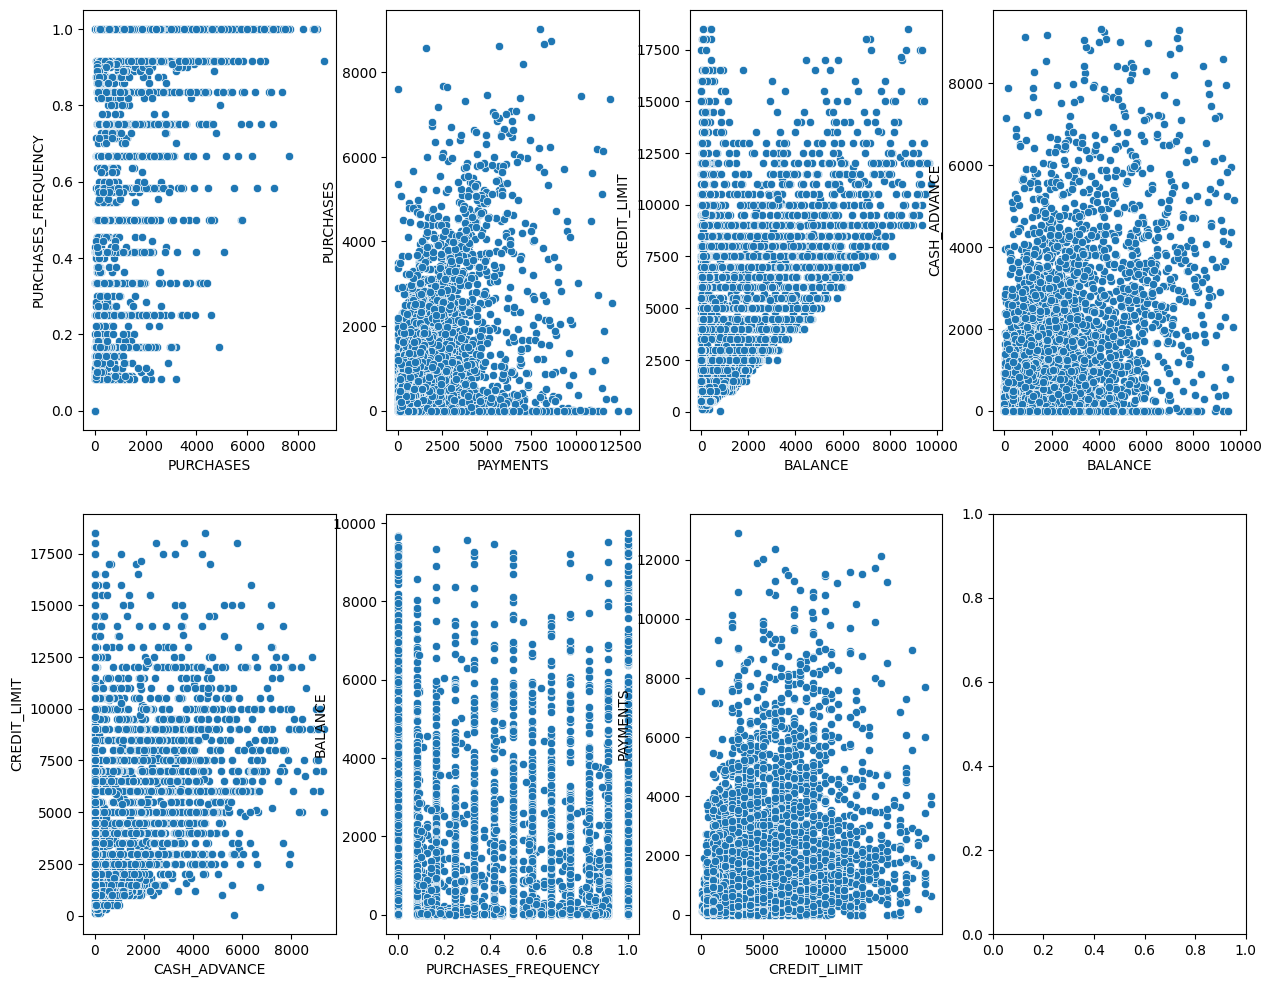

In [684]:
# Conduct bi-variate analysis between potentially important features
fig, axs = plt.subplots(2,4, figsize=(15,12))
sns.scatterplot(x=df2['PURCHASES'], y=df2['PURCHASES_FREQUENCY'], ax=axs[0][0])
sns.scatterplot(x=df2['PAYMENTS'], y=df2['PURCHASES'], ax=axs[0][1])
sns.scatterplot(x=df2['BALANCE'], y=df2['CREDIT_LIMIT'], ax=axs[0][2])
sns.scatterplot(x=df2['BALANCE'], y=df2['CASH_ADVANCE'], ax=axs[0][3])
sns.scatterplot(x=df2['CASH_ADVANCE'], y=df2['CREDIT_LIMIT'], ax=axs[1][0])
sns.scatterplot(x=df2['PURCHASES_FREQUENCY'], y=df2['BALANCE'], ax=axs[1][1])
sns.scatterplot(x=df2['CREDIT_LIMIT'], y=df2['PAYMENTS'], ax=axs[1][2])

In [685]:
import warnings
warnings.filterwarnings("ignore")

In [686]:
df3 = df2.copy()

In [687]:
# Drop customer_id
df3.drop('CUST_ID', axis = 1, inplace = True)

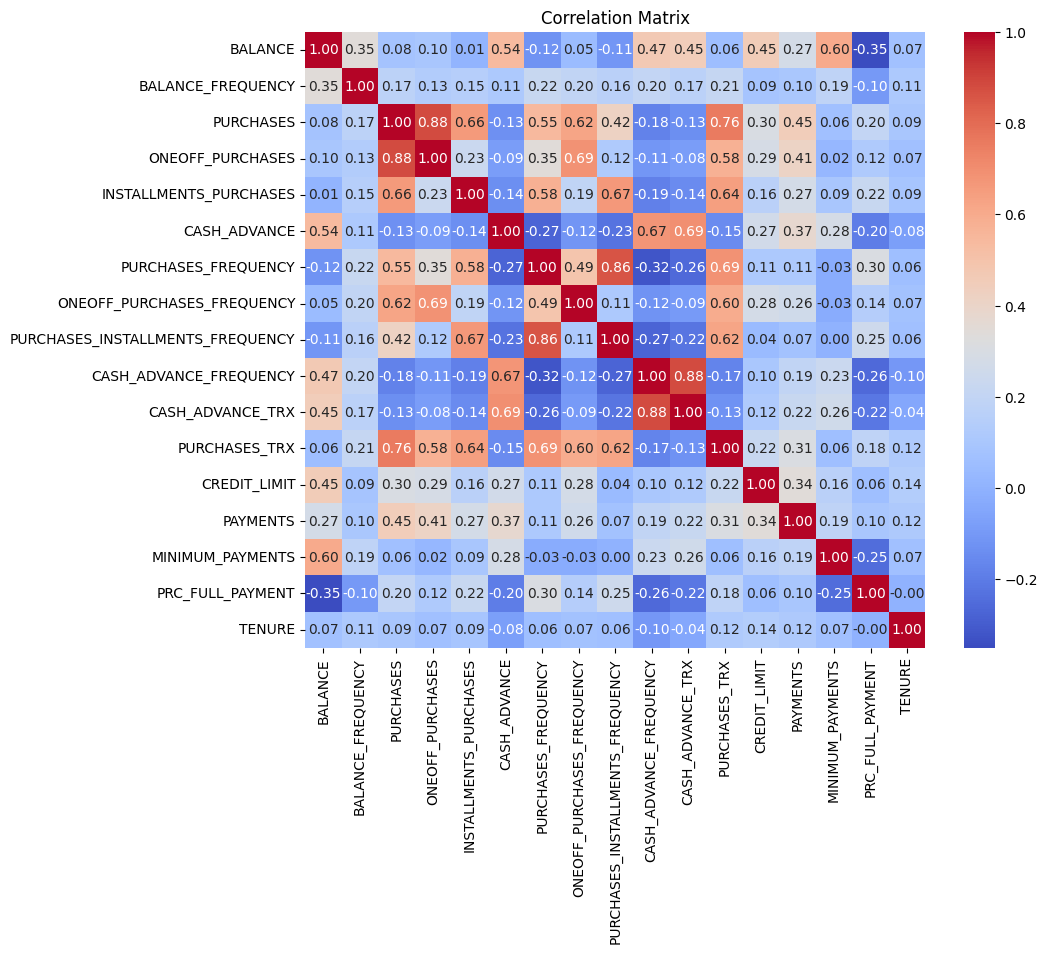

In [688]:
correlation_matrix = df3.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [689]:
selected_columns = ['PURCHASES', 'CREDIT_LIMIT', 'PURCHASES_FREQUENCY', 'BALANCE', 'CASH_ADVANCE', 'PAYMENTS']

In [690]:
df4 = df3[selected_columns]

In [691]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8247 entries, 0 to 8912
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PURCHASES            8247 non-null   float64
 1   CREDIT_LIMIT         8247 non-null   float64
 2   PURCHASES_FREQUENCY  8247 non-null   float64
 3   BALANCE              8247 non-null   float64
 4   CASH_ADVANCE         8247 non-null   float64
 5   PAYMENTS             8247 non-null   float64
dtypes: float64(6)
memory usage: 451.0 KB


Using the heatmap from the correlation matrix, we assessed the relationship between variables, positive or negative, to identify features that will inform the clustering and help develop marketing decisions. Based on our analysis, we determined that the following columns are somewhat dependent on each other and can provide valuable information for the segmentation of customers - 
- 'Balance' - The remaining balance in a customer's account can be used for purchases. It provides insights into how customers manage their card balances and whether they carry balances. 
- 'Credit_Limit' - The credit limit assigned to customers is a crucial factor that can impact their spending capacity and payment behaviour. It's an essential feature for assessing customer creditworthiness and behaviour.
- 'Purchases' - This feature provides insights into a customer's spending behaviour and the total amount spent on purchases. Understanding how much customers spend is a fundamental factor in customer segmentation.
- 'Purchases_Frequency' - This score between 0 and 1 indicates how frequently purchases are made from the account. It offers insights into customer spending habits and frequency.
- 'Cash_Advance' - The number of cash advances taken by customers and the associated behaviour can indicate their financial needs and habits. Cash advance behaviour is essential for risk assessment and segmentation.
- 'Payments' - The total amount of payments customers make indicates their payment behaviour. It's essential to understand whether customers are making timely payments or carrying balances.

These six features cover a broad spectrum of customer behaviour, including spending, payment, credit utilization, and cash advance behaviour. Analyzing these features can help distinguish between clusters and provide actionable insights for business recommendations, such as targeted marketing, credit limit adjustments, or tailored financial products.

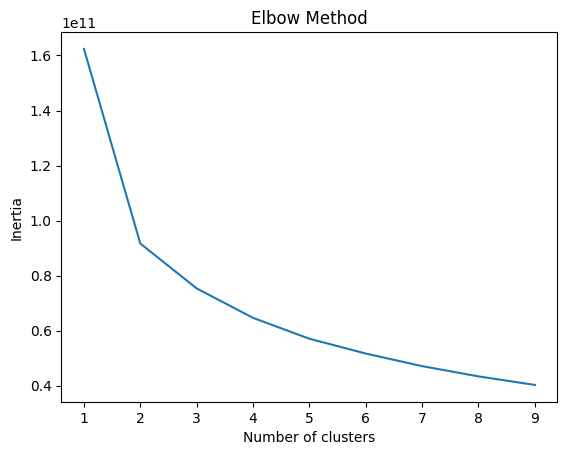

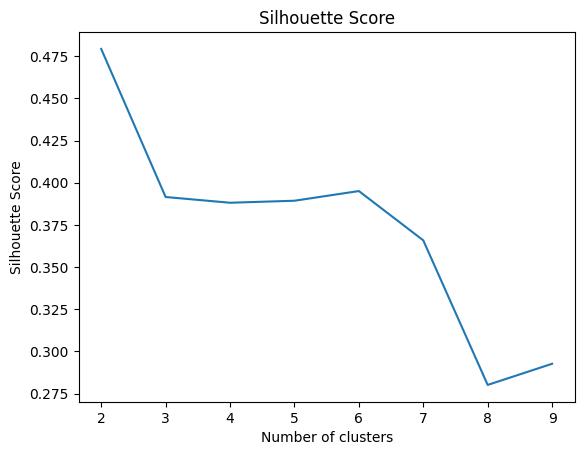

In [692]:
# Calculate Intertia and Silhoutte Score
inertia = []
silhouette_avg = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df4)
    inertia.append(kmeans.inertia_)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    if i>1:
        silhouette_avg = silhouette_avg + [silhouette_score(df4, labels)]


plt.plot(range(1, 10), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


plt.plot(range(2, 10), silhouette_avg)
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

## 3. Clustering Algorithms

In [693]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df4)

In [694]:
df5 = df4.copy()

### 3.1 K-Means Clsutering

In [695]:
K = 3
kmeans = KMeans(n_clusters=K, random_state=0)
df5['KMeans_Clusters'] = kmeans.fit_predict(scaled_df)

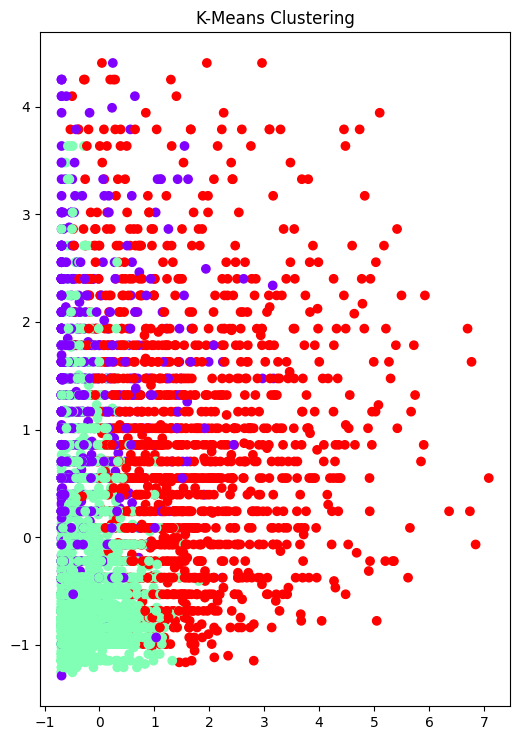

In [696]:
plt.figure(figsize=(15, 7.5))

# K-Means Clustering
plt.subplot(1, 3, 1)
plt.scatter(scaled_df[:, 0], scaled_df[:, 1], c=df5['KMeans_Clusters'], cmap='rainbow')
plt.title('K-Means Clustering')
plt.tight_layout()
plt.show()

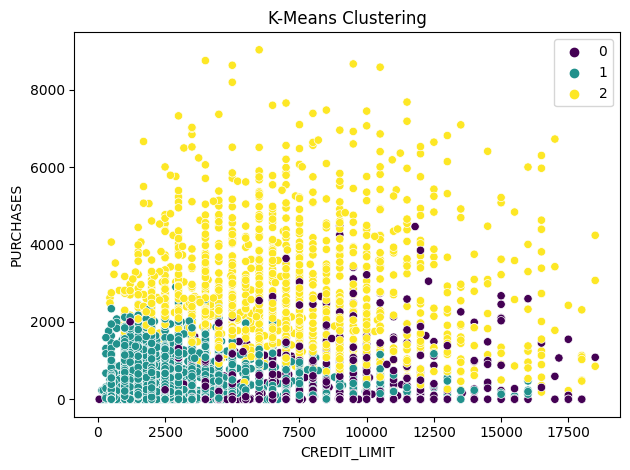

In [697]:
sns.scatterplot(x='CREDIT_LIMIT', y='PURCHASES', hue=kmeans.labels_, data=df5, palette='viridis')

plt.title('K-Means Clustering')
plt.xlabel('CREDIT_LIMIT')
plt.ylabel('PURCHASES')

plt.tight_layout()
plt.show()

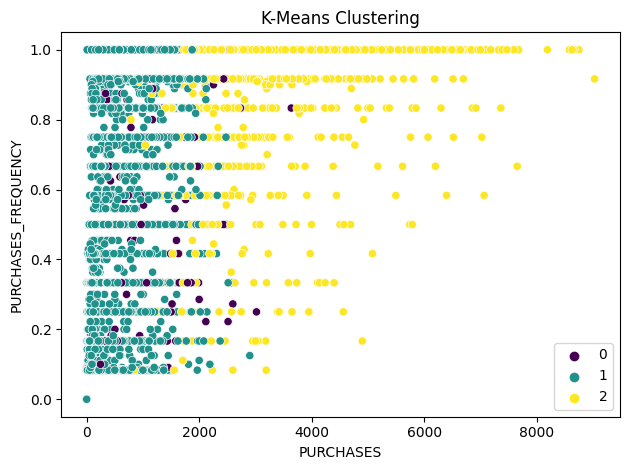

In [698]:
sns.scatterplot(x='PURCHASES', y='PURCHASES_FREQUENCY', hue=kmeans.labels_, data=df5, palette='viridis')

plt.title('K-Means Clustering')
plt.xlabel('PURCHASES')
plt.ylabel('PURCHASES_FREQUENCY')

plt.tight_layout()
plt.show()

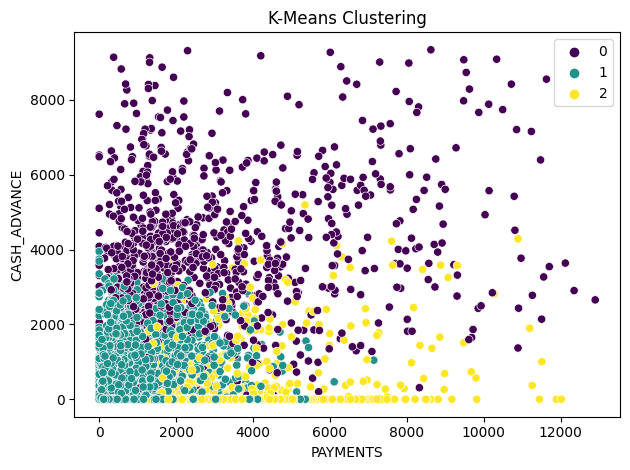

In [699]:
sns.scatterplot(x='PAYMENTS', y='CASH_ADVANCE', hue=kmeans.labels_, data=df5, palette='viridis')

plt.title('K-Means Clustering')
plt.xlabel('PAYMENTS')
plt.ylabel('CASH_ADVANCE')

plt.tight_layout()
plt.show()

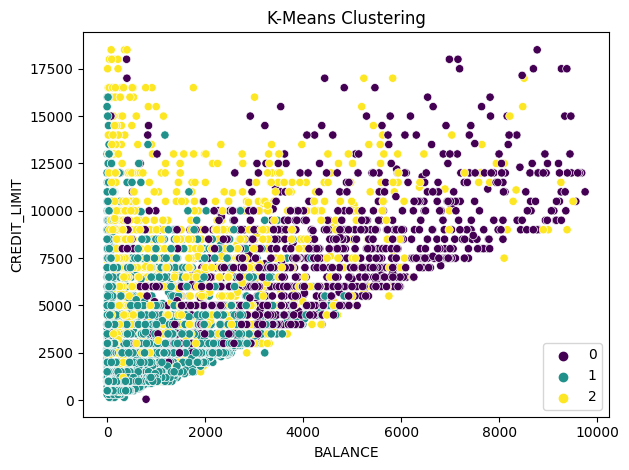

In [700]:
sns.scatterplot(x='BALANCE', y='CREDIT_LIMIT', hue=kmeans.labels_, data=df5, palette='viridis')

plt.title('K-Means Clustering')
plt.xlabel('BALANCE')
plt.ylabel('CREDIT_LIMIT')

plt.tight_layout()
plt.show()

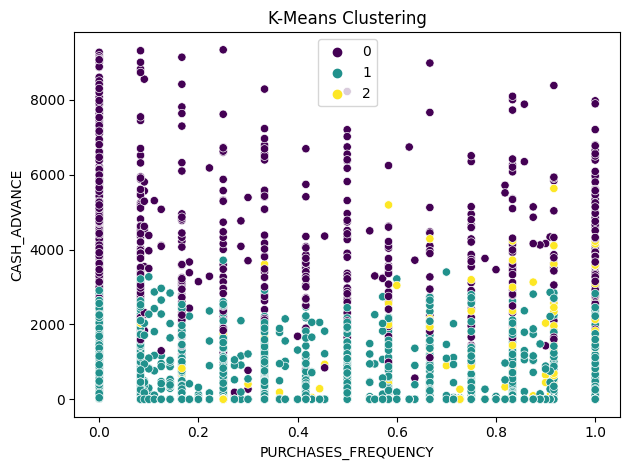

In [701]:
sns.scatterplot(x='PURCHASES_FREQUENCY', y='CASH_ADVANCE', hue=kmeans.labels_, data=df5, palette='viridis')

plt.title('K-Means Clustering')
plt.xlabel('PURCHASES_FREQUENCY')
plt.ylabel('CASH_ADVANCE')

plt.tight_layout()
plt.show()

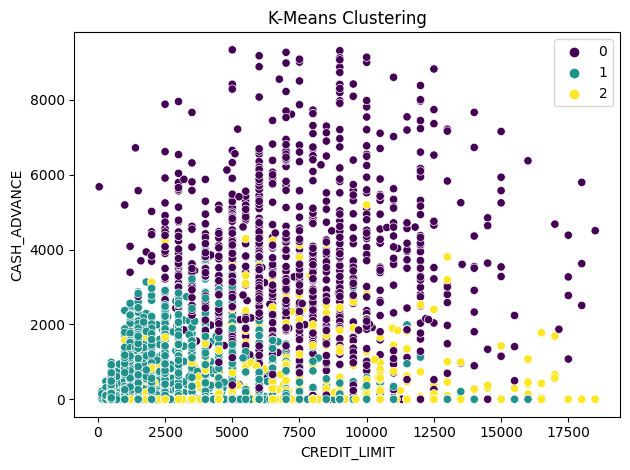

In [702]:
sns.scatterplot(x='CREDIT_LIMIT', y='CASH_ADVANCE', hue=kmeans.labels_, data=df5, palette='viridis')

plt.title('K-Means Clustering')
plt.xlabel('CREDIT_LIMIT')
plt.ylabel('CASH_ADVANCE')

plt.tight_layout()
plt.show()

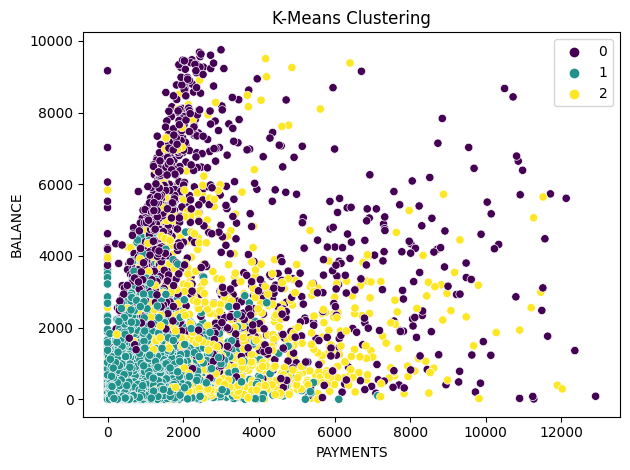

In [703]:
sns.scatterplot(x='PAYMENTS', y='BALANCE', hue=kmeans.labels_, data=df5, palette='viridis')

plt.title('K-Means Clustering')
plt.xlabel('PAYMENTS')
plt.ylabel('BALANCE')

plt.tight_layout()
plt.show()

We first start by creating K-Means Clusters; based on the Elbow Method and Silhouette score, we decided that creating 3 clusters would be appropriate as 
- We can use more granular results to make meaningful business decisions, even though according to the silhouette score, n_clusters = 2 is a more appropriate option
- Since we compared two features at a time, having 3 clusters would be appropriate to understand high, medium and low levels of relationship between the features

However, since the dataset we have is not spherical or circular, K-Means was unable to partition the clusters clearly and provide an adequate distinction between the features. Therefore, it wasn't easy to extrapolate meaningful insights from the different graphs.

We will now compare similar relationships with Hierarchical and DBSCAN Clustering to understand which clustering method is the most appropriate and what features are most significant is distinguising between clusters.

### 3.2 Hierarchical Clustering

In [704]:
df6 = df4.copy()

In [705]:
agg_clustering = AgglomerativeClustering(n_clusters=3)
df6['Hierarchical_Clusters'] = agg_clustering.fit_predict(scaled_df)

In [706]:
linkage_matrix = linkage(scaled_df, method='ward')

In [707]:
plt.figure(figsize=(20, 17))

<Figure size 2000x1700 with 0 Axes>

<Figure size 2000x1700 with 0 Axes>

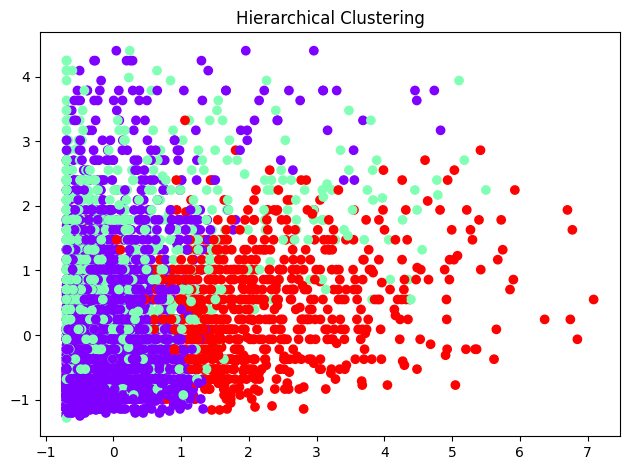

In [708]:
plt.subplot(1, 1, 1)
plt.scatter(scaled_df[:, 0], scaled_df[:, 1], c=df6['Hierarchical_Clusters'], cmap='rainbow')
plt.title('Hierarchical Clustering')
plt.tight_layout()
plt.show()

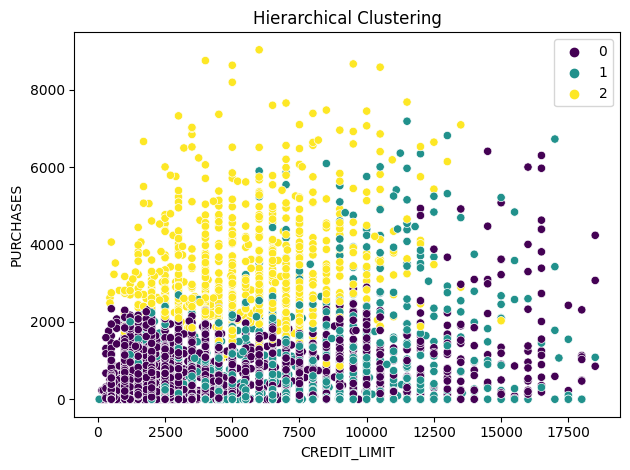

In [709]:
sns.scatterplot(x='CREDIT_LIMIT', y='PURCHASES', hue=agg_clustering.labels_, data=df6, palette='viridis')

plt.title('Hierarchical Clustering')
plt.xlabel('CREDIT_LIMIT')
plt.ylabel('PURCHASES')

plt.tight_layout()
plt.show()

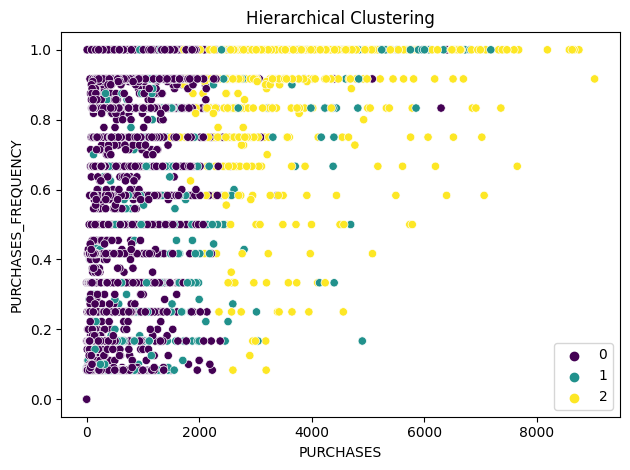

In [710]:
sns.scatterplot(x='PURCHASES', y='PURCHASES_FREQUENCY', hue=agg_clustering.labels_, data=df6, palette='viridis')

plt.title('Hierarchical Clustering')
plt.xlabel('PURCHASES')
plt.ylabel('PURCHASES_FREQUENCY')

plt.tight_layout()
plt.show()

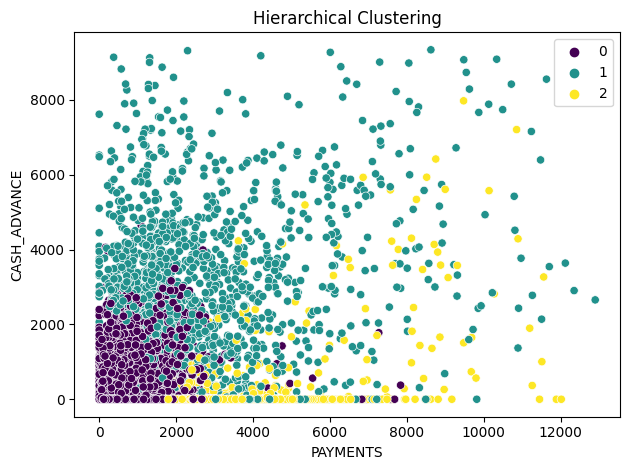

In [711]:
sns.scatterplot(x='PAYMENTS', y='CASH_ADVANCE', hue=agg_clustering.labels_, data=df6, palette='viridis')

plt.title('Hierarchical Clustering')
plt.xlabel('PAYMENTS')
plt.ylabel('CASH_ADVANCE')

plt.tight_layout()
plt.show()

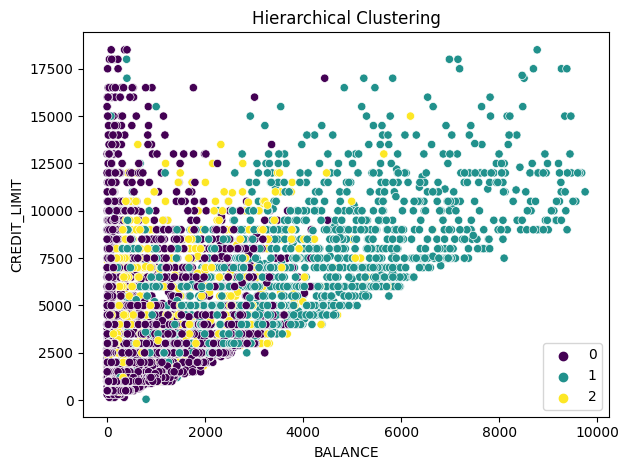

In [712]:
sns.scatterplot(x='BALANCE', y='CREDIT_LIMIT', hue=agg_clustering.labels_, data=df6, palette='viridis')

plt.title('Hierarchical Clustering')
plt.xlabel('BALANCE')
plt.ylabel('CREDIT_LIMIT')

plt.tight_layout()
plt.show()

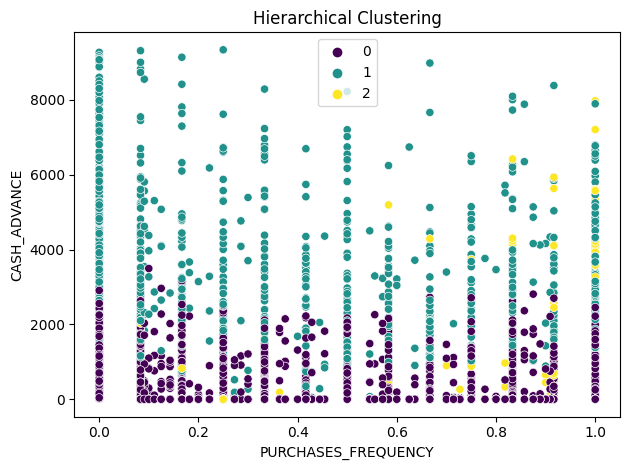

In [713]:
sns.scatterplot(x='PURCHASES_FREQUENCY', y='CASH_ADVANCE', hue=agg_clustering.labels_, data=df6, palette='viridis')

plt.title('Hierarchical Clustering')
plt.xlabel('PURCHASES_FREQUENCY')
plt.ylabel('CASH_ADVANCE')

plt.tight_layout()
plt.show()

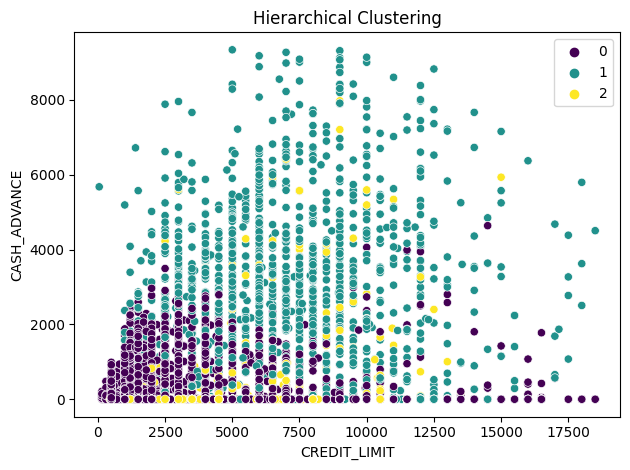

In [714]:
sns.scatterplot(x='CREDIT_LIMIT', y='CASH_ADVANCE', hue=agg_clustering.labels_, data=df6, palette='viridis')

plt.title('Hierarchical Clustering')
plt.xlabel('CREDIT_LIMIT')
plt.ylabel('CASH_ADVANCE')

plt.tight_layout()
plt.show()

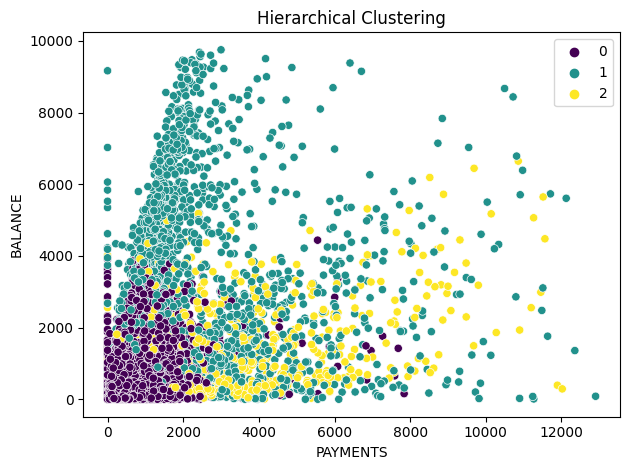

In [715]:
sns.scatterplot(x='PAYMENTS', y='BALANCE', hue=agg_clustering.labels_, data=df6, palette='viridis')

plt.title('Hierarchical Clustering')
plt.xlabel('PAYMENTS')
plt.ylabel('BALANCE')

plt.tight_layout()
plt.show()

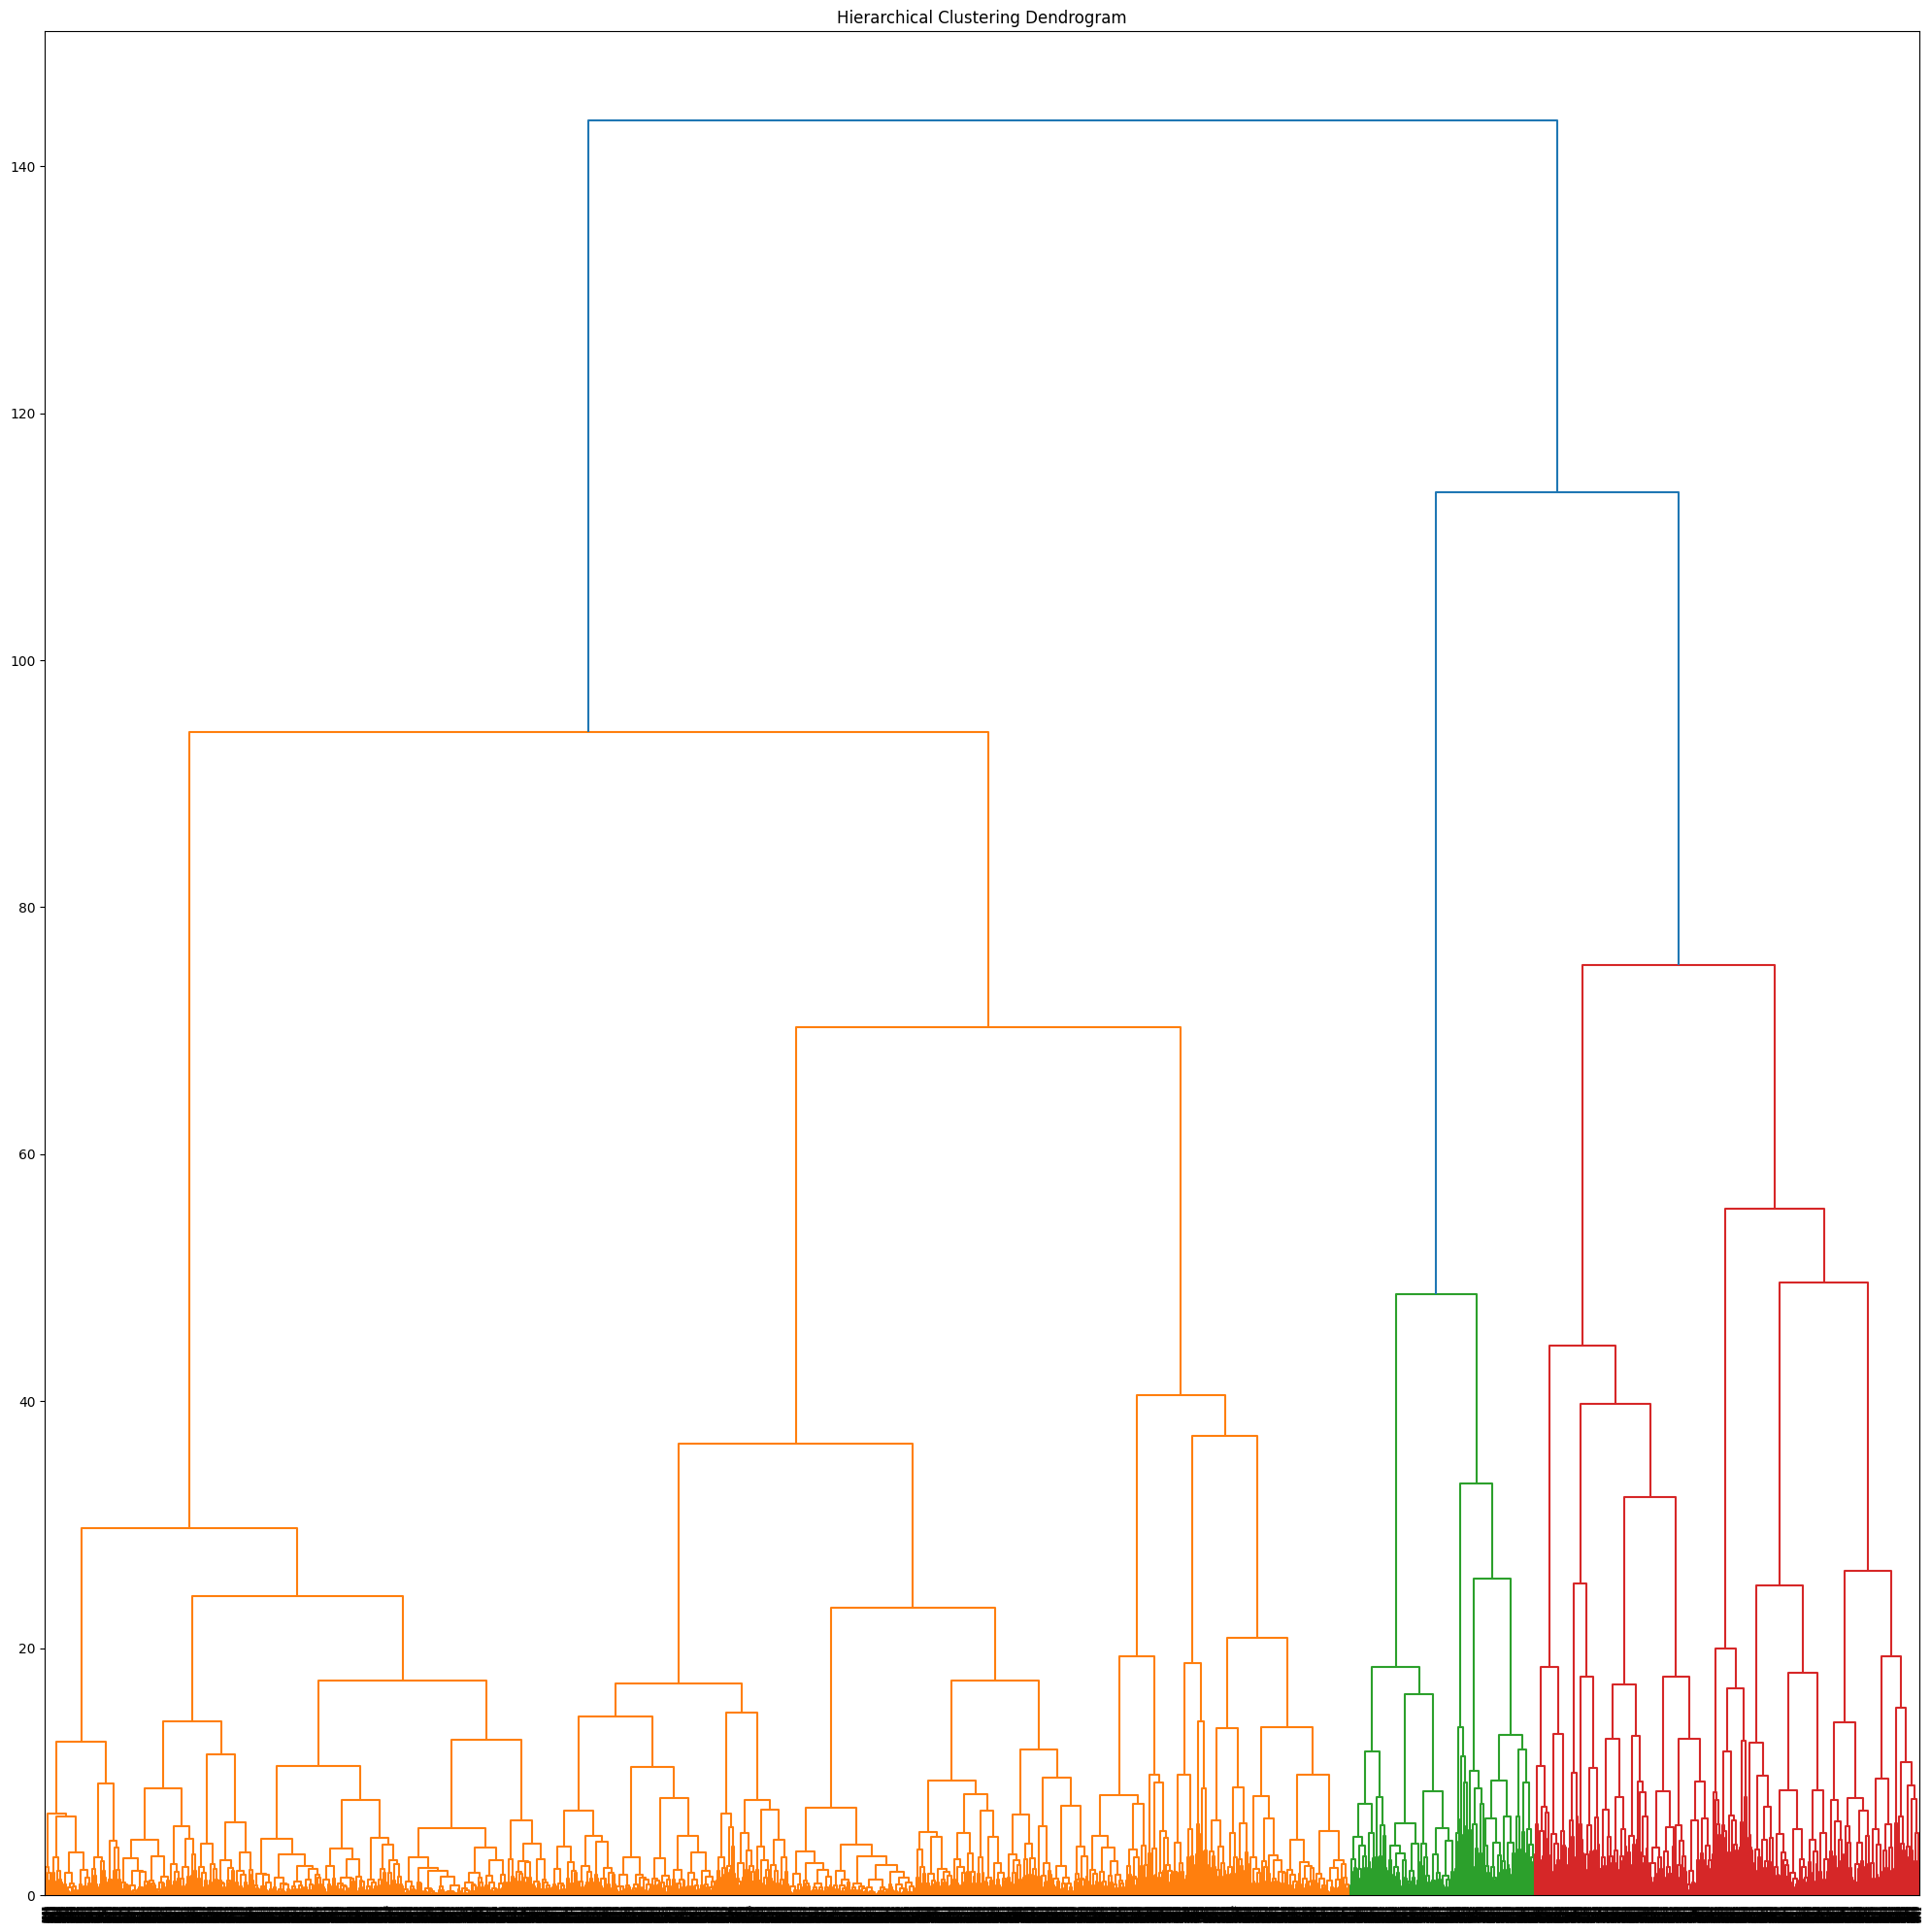

In [716]:
# Dendrogram
plt.figure(figsize=(20, 20))

plt.subplot(1, 1, 1)
dendrogram(linkage_matrix, orientation='top', labels=df6.index)
plt.title('Hierarchical Clustering Dendrogram')

plt.tight_layout()
plt.show()

Using the hierarchical clustering method, we observed that some charts had a more apparent distinction between the clusters than K-Means clustering. This distinction was primarily because the dataset provided is not spherical, and K-Means assumes that clusters are globular and equally sized. 
Using the dendrogram, we initially cut the height at 60 and formed 6 clusters; however, to keep the comparison consistent with the K-Means clustering, we decided to create and compare between 2 and 3 clusters for each chart. We will confirm after comparing it with DBSCAN Clustering.

Although we see relatively more distinct clusters using the hierarchical method as it is more flexible and can adapt to different shapes and sizes, it is more computationally expensive than K-Means. Hence, we will make a final decision about which method is more appropriate after considering DBSCAN as well.

In [717]:
df7 = df4.copy()

DBSCAN Silhouette Score: 0.3133292649177806


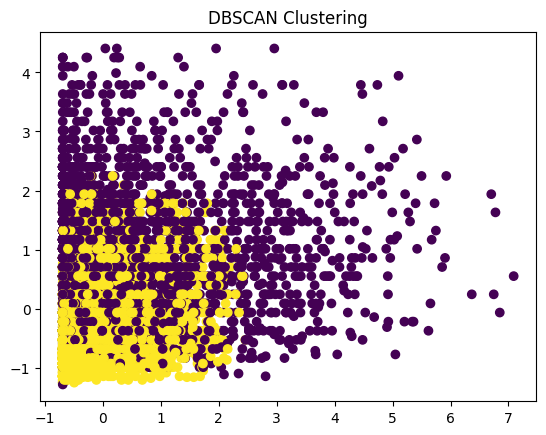

In [718]:
dbscan = DBSCAN(eps=0.6, min_samples=30)
dbscan_labels = dbscan.fit_predict(scaled_df)

# Silhouette Score
if len(set(dbscan_labels)) > 1:
    dbscan_sil_score = silhouette_score(scaled_df, dbscan_labels)
    print(f"DBSCAN Silhouette Score: {dbscan_sil_score}")

# Plotting
plt.scatter(scaled_df[:, 0], scaled_df[:, 1], c=dbscan_labels)
plt.title('DBSCAN Clustering')
plt.show()

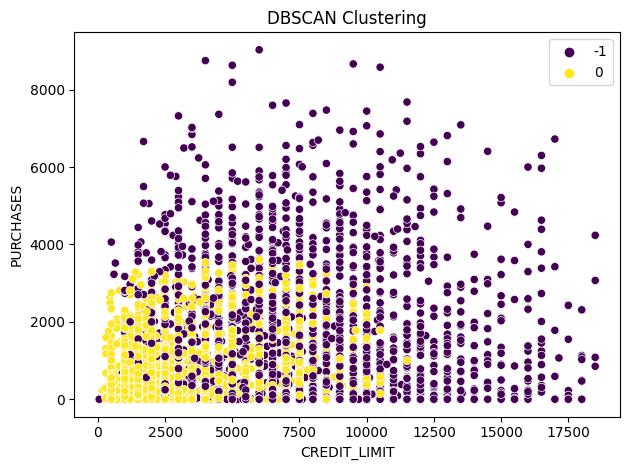

In [719]:
sns.scatterplot(x='CREDIT_LIMIT', y='PURCHASES', hue=dbscan.labels_, data=df7, palette='viridis')

plt.title('DBSCAN Clustering')
plt.xlabel('CREDIT_LIMIT')
plt.ylabel('PURCHASES')

plt.tight_layout()
plt.show()

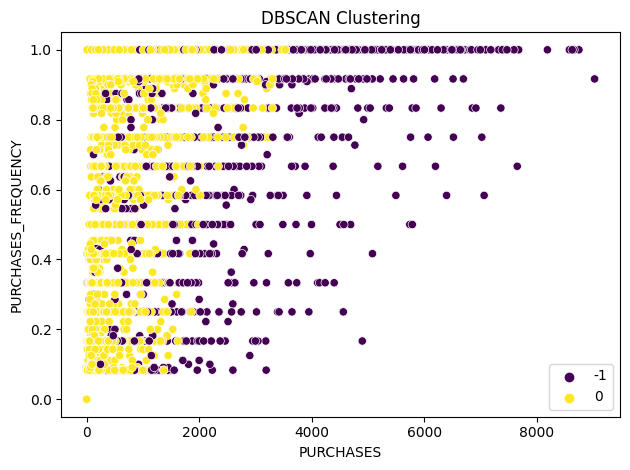

In [720]:
sns.scatterplot(x='PURCHASES', y='PURCHASES_FREQUENCY', hue=dbscan.labels_, data=df7, palette='viridis')

plt.title('DBSCAN Clustering')
plt.xlabel('PURCHASES')
plt.ylabel('PURCHASES_FREQUENCY')

plt.tight_layout()
plt.show()

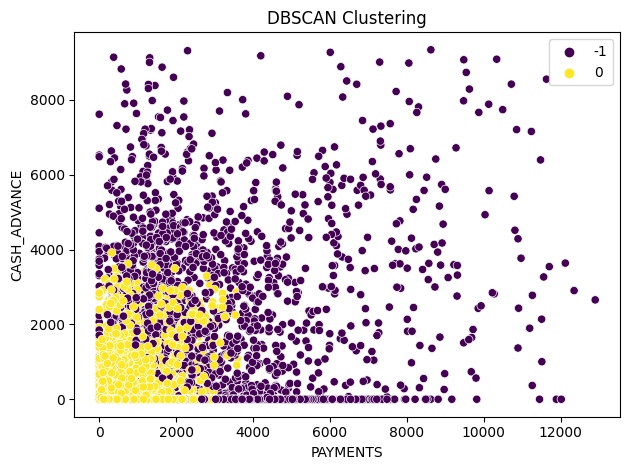

In [721]:
sns.scatterplot(x='PAYMENTS', y='CASH_ADVANCE', hue=dbscan.labels_, data=df7, palette='viridis')

plt.title('DBSCAN Clustering')
plt.xlabel('PAYMENTS')
plt.ylabel('CASH_ADVANCE')

plt.tight_layout()
plt.show()

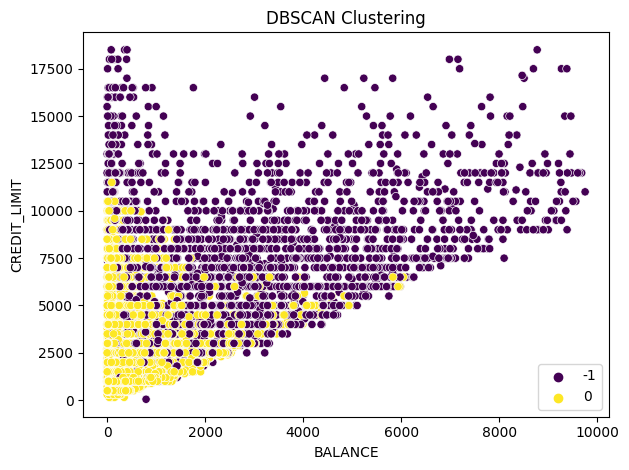

In [722]:
sns.scatterplot(x='BALANCE', y='CREDIT_LIMIT', hue=dbscan.labels_, data=df7, palette='viridis')

plt.title('DBSCAN Clustering')
plt.xlabel('BALANCE')
plt.ylabel('CREDIT_LIMIT')

plt.tight_layout()
plt.show()

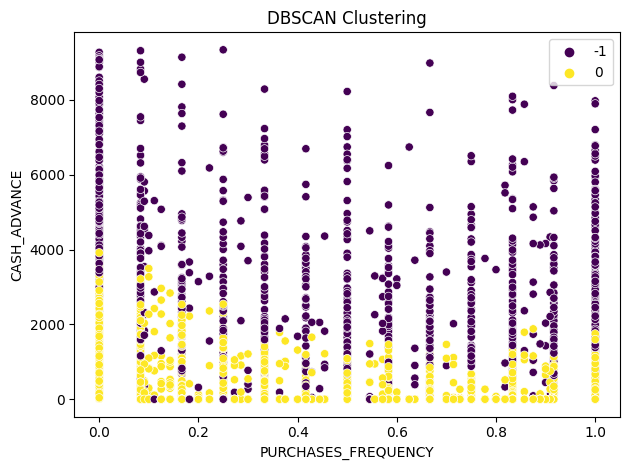

In [723]:
sns.scatterplot(x='PURCHASES_FREQUENCY', y='CASH_ADVANCE', hue=dbscan.labels_, data=df7, palette='viridis')

plt.title('DBSCAN Clustering')
plt.xlabel('PURCHASES_FREQUENCY')
plt.ylabel('CASH_ADVANCE')

plt.tight_layout()
plt.show()

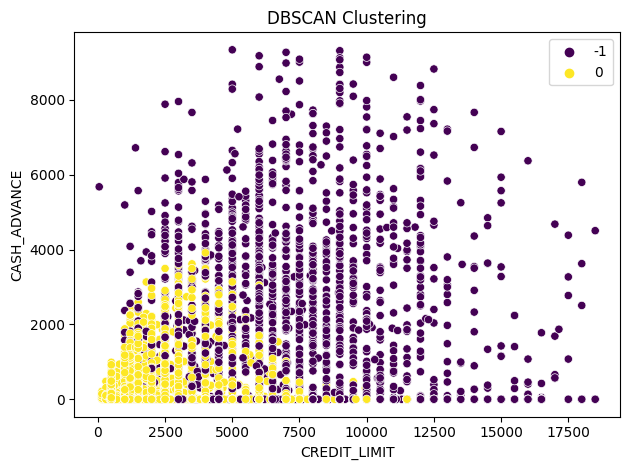

In [724]:
sns.scatterplot(x='CREDIT_LIMIT', y='CASH_ADVANCE', hue=dbscan.labels_, data=df7, palette='viridis')

plt.title('DBSCAN Clustering')
plt.xlabel('CREDIT_LIMIT')
plt.ylabel('CASH_ADVANCE')

plt.tight_layout()
plt.show()

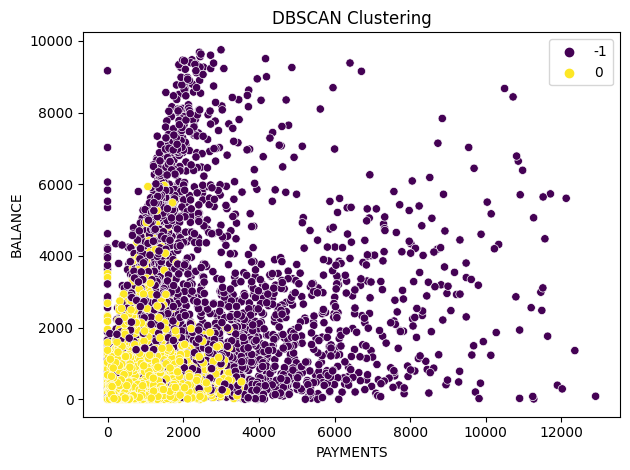

In [725]:
sns.scatterplot(x='PAYMENTS', y='BALANCE', hue=dbscan.labels_, data=df7, palette='viridis')

plt.title('DBSCAN Clustering')
plt.xlabel('PAYMENTS')
plt.ylabel('BALANCE')

plt.tight_layout()
plt.show()

Since DBSCAN is a density-based clustering, it identifies clusters based on data density, with points in high-density regions forming clusters. The positive aspect of DBSCAN is that it detects the number of clusters automatically and is effective at handling noise and detecting outliers. In this case, DBSCAN created 2 clusters automatically, and upon comparing them with Hierarchical clustering (n_clusters = 3), it is evident that Hierarchical does a better job distinguishing various clusters. 

Since we have a small dataset, it is hard to compare which DBSCAN or Hierarchical Clustering is more computationally expensive. However, since we've had to go back and forth on the number of clustering using the Dendogram and comparison in Hierarchical clustering, and it provides more granular details than DBSCAN seems to provide **Therefore, in this case, we will go ahead with Hierarchical Clustering.**

## 4. Interpreting Clusters

Now that we've established that Hierarchical is a more practical clustering method for this dataset, we will look at different clusters to gather meaningful insights to help drive our strategic business recommendations.

**CREDIT_LIMIT v. PURCHASES**
- This chart provides a comprehensive overview of customer purchasing behaviour based on their credit limits. It allows us to assess a customer's capacity to exhaust their credit limit and categorize them into two primary groups: Aggressive and Conservative spenders.
- Aggressive Customers: Individuals who tend to fully utilize or even exceed their credit limits, indicating a higher propensity for risk. They can be further classified into the following subcategories:
  - Students and Young Adults: This group typically has lower credit limits but actively uses their cards, leading to rapid credit utilization. Their financial behaviour is often driven by necessity or lifestyle.
  - Low-Income Earners: Despite having lower credit limits, these customers actively use their credit cards for daily expenses. They rely on credit as a means of meeting their immediate financial needs.
  - Emergency Situations: Customers facing unexpected financial emergencies may experience a sudden surge in credit card utilization as they use credit to address these unforeseen circumstances.
- Conservative Customers: On the other hand, these customers possess substantial credit limits but maintain low to moderate credit card balances. They exhibit responsible financial behaviour and prefer to avoid unnecessary risks with their credit score. They can be further categorized as:
  - High-Income Earners: Even with high credit limits, these customers view credit cards primarily as a convenient payment method rather than a source of financing. They tend to have the financial means to cover their expenses without relying heavily on credit.
  - Savers and Investors: This group regards credit cards as a backup option and prioritises saving and investing. They prefer to maintain their financial stability while using credit sparingly.
  - Retired Individuals: Retirees who use credit cards for convenience still manage their balances diligently despite having substantial credit lines accumulated over their working years. They prioritize maintaining financial prudence in their post-retirement years.

**PURCHASES v. PURCHASES_FREQUENCY**
- This chart provides insights into a customer's spending behaviour, specifically whether they engage in less frequent but higher-value purchases or more frequent but lower-value purchases. Let's categorize these customer behaviors more vividly:
- Frequent, Lower-Value Purchasers: These customers actively use their credit cards for everyday expenses with relatively lower individual purchase amounts. They prioritize smaller, routine spending. This category typically includes:
  - Everyday or Budget Shoppers: These individuals utilize their credit cards for everyday needs like grocery shopping or dining out. They can be found in the top left corner of the chart, with purchase frequencies exceeding 0.6 and purchases under $4,000.
- Less Frequent, High-Value Purchasers: In this category, customers make credit card purchases infrequently, but these transactions are of significant value. This group comprises:
  - Occasional Luxury Shoppers: These individuals use their credit cards for high-end fashion, luxury items, or premium products on a sporadic basis.
  - Travelers: Customers in this group make substantial credit card purchases for travel-related expenses, such as vacations or flights, but do so only once or twice a year.
- Less Frequent, Lower-Value Purchasers: These customers exercise caution in spending, making smaller and less frequent credit card purchases. Their motivation may be budget constraints or a desire to track their expenses meticulously. This category includes:
  - Subscription Service Users: Individuals who exclusively use their credit cards for purchasing subscriptions to services like OTT platforms or meal kits.
  - Niche Shoppers: People with specific hobbies and interests who rely on their credit cards for buying supplies or equipment related to their interests, such as art or gardening supplies.

**BALANCE v. CREDIT_LIMIT**
- This chart provides insights into customer credit utilization, with a focus on identifying three distinct customer segments based on their credit card behaviour:
- Low Balance, Low Credit Limit Customers: In this category, customers have relatively low credit card limits and maintain low balances. They tend to use their credit cards sparingly and prioritize alternative means of payment. This segment includes:
  - New Credit Users: Individuals new to the world of credit cards often need more credit histories, resulting in lower credit limits.
  - Emergency Users: These customers view credit cards as a financial safety net. They keep low balances but maintain available credit in case of emergencies or unexpected expenses.
- Low Balance, High Credit Limit Customers: These customers have high credit limits but maintain low balances. While they can access more credit, they choose to utilize it sparingly. This segment encompasses:
  - Financial Planners: Individuals who intentionally maintain low balances as part of their financial planning strategy, possibly to avoid accumulating debt.
  - Occasional Credit Users: Customers who selectively use credit cards for specific purposes, such as travel or high-value purchases, but maintain low balances overall.
- High Balance, High Credit Limit Customers: In this category, customers possess high credit card limits and maintain high balances. They actively use their credit cards for various expenses, often involving more substantial financial transactions. This segment includes:
  - Business Professionals and Corporate Cardholders: These individuals use credit cards for corporate expenses, including business travel, client entertainment, and other work-related transactions. Their high balances are reflective of the nature of their business-related spending.

**CREDIT_LIMIT v. CASH_ADVANCE**
- This pair of charts is a valuable tool for assessing how customers utilize cash advances about their credit limits. It sheds light on their financial needs and risk behaviour, helping to distinguish between two primary customer segments:
- Rare Cash Advance Users: Customers in this category demonstrate responsible financial behaviour by rarely resorting to cash advances. They prefer using their credit cards for purchases rather than cash withdrawals and often exhibit sound financial planning and savings habits. This segment includes:
  - Credit Card Aficionados: These customers view their credit cards primarily as a convenient payment tool and do not see them as a source of cash. They rely on their cards for everyday transactions.
  - Tech-Forward Millennials or Young Professionals: This group embraces digital payment methods, prioritizing mobile wallets and contactless payments while avoiding cash advances as they seek convenience and efficiency in their financial transactions.
- Frequent Cash Advance Users: Customers in this group resort to cash advances more frequently, potentially indicating financial difficulties or temporary cash flow issues. They rely on cash advances as a quick source of funds, even if it means incurring higher costs. This segment includes:
  - Small Business Owners in Need: Small business owners who require immediate working capital may turn to cash advances to secure funds promptly, supporting their day-to-day business operations.
  - Event Planners and Promoters: Professionals involved in event management, promotion, or ticketing often require upfront cash for venue bookings, marketing expenses, or other event-related costs, driving them to utilize cash advances for quick access to funds.

**PAYMENTS v. BALANCE**
- This pair can help identify customers based on their payment behavior and whether they carry balances. Customers who make timely payments may have different spending habits from those who carry balances
- *Customers with low balances, low payments:* Customers in this category exhibit a conservative approach to using their credit cards. They make low-value purchases and prefer to maintain minimal balances on their cards. These individuals are financially prudent and prioritize living within their means.
  - Low-Income Households: Customers with lower income levels may have credit cards with low credit limits.
  - Budget-Conscious Seniors: Some retirees or seniors who are financially prudent and living on fixed incomes may prefer low credit limits.
- *Customers with high balance, high payments:* These customers frequently use their credit cards for various transactions, including both everyday expenses and larger purchases. The ability to make high payments while maintaining high balances indicates strong financial capacity. Customers in this category may have higher incomes or significant financial resources.
  - Business Executives: Some business professionals with high-limit corporate credit cards may fall into this category
- *Customers with high balance, low payments:* Customers in this category tend to accumulate substantial credit card balances, but they make minimal payments relative to their balances. Their low payments relative to high balances may indicate financial stress or challenges. These customers may need financial guidance or debt management assistance.

Based on the above insights and clusters formed, I believe 'CREDIT_LIMIT', 'PURCHASES', 'BALANCE', 'CASH_ADVANCE' and 'PAYMENTS' are the most important features distinguising between clusters.

## 5. Actionable Insights

Based on the following insights, I would provide the following recommendations to the business.

Firstly, I encourage the company to segment their customers into various buckets based on their credit utilization, financial habits and spending behaviour, tailoring their strategies and offerings to meet the specific needs of each customer segment more effectively. At an overarching level, we can segment most customers into the following categories.

1. Aggressive Customers - For these customers, the business can offer credit limit adjustments based on their payment history and financial education. Since their high credit utilization with limited credit available can result in defaults, it is essential to identify customers showing signs of excessive debt and offer debt management assistance

2. Conservative Customers - Offer rewards tailored for high-income earners focusing on non-financial incentives such as exclusive access, concierge services, or personalized experiences and for continuing to imbibe responsible financial habits.

3. Routine Spenders - Loyalty points and cashback offers on credit cards, rewarding these purchasers, making their daily expenses more rewarding, and encouraging them to continue using and engaging the company's credit card.

4. Business Financial Professionals - Provide corporate discounts on travel deals, insurance perks and expense management solutions such as better interest rates with banks and stock brokers or tailor business solutions for small business owners requiring working capital loans or lines of credit to address their specific needs promptly and efficiently. However, it is essential to continuously monitor the customer base for this, i.e., only businesses with enough collateral or high-income earners, as these involve a high risk of defaults and bankruptcy, creating liability for the bank/company. 

5. Occasional Shoppers - Offering personalized promotions and focused packages based on their spending tendency, i.e., travel-focused packages and luxury brand discounts for high-spenders, while discounts on subscription services and personalized niched items can help retain this customer and bring in new customers with similar behaviour.

Secondly, although these are the broad categories we can segment most customers into based on insights gathered through clustering, it is essential to note that within each category, there can be groups of customers showcasing different behaviours. Identifying these behaviours and tailoring offerings is critical to a business, provided they contribute significantly to its sales. Also, the business should conduct an ABC Analysis to understand which customers are bringing in more business vs. less and then invest their resources accordingly, tailoring offerings. 

Lastly, the business should focus on retaining Conservative Customers and Routine Spenders, as they are likelier to exhibit loyalty while optimizing short-term profitability from Aggressive Customers, Business Financial Professionals, and Occasional Shoppers by tailoring offers to their specific needs.